In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

#Import and Clean Data

In [4]:
def clean_data(df):
    '''
    changes column names, creates a column for correct answers
    args: raw dataframe
    returns: cleaned dataframe
    '''
    d = df.copy()
    d.rename(columns={'name.1':'topic'},inplace=True)
    d.rename(columns={'name':'testID'},inplace=True)
    
    #create column for correct answers
    d['correct'] = 0
    d.loc[d['Studentsanswer']==d['CorrectAnswer'],'correct']=1
    
    return d

def addNumTopics(rawDF):
    '''
    get the number of topics associated with each question
    args:df
    returns: df with numTopics attached
    '''
    df = rawDF.copy()
    qg = groupData(df,['firstName','testID','testQuestionNumber','testSectionNumber'],'correct')
    qg2 = qg.groupby(['testID','testQuestionNumber','testSectionNumber']).max().reset_index()
    qg2.sort(['testID','testSectionNumber','testQuestionNumber','firstName'])
    qg2.rename(columns={'size':'numTopics'}, inplace=True)
    df = pd.merge(df, qg2[['testID','testQuestionNumber','testSectionNumber','numTopics']], how='left', on=['testID','testQuestionNumber','testSectionNumber'])
    return df

In [5]:
def groupByStudentTypeTopic(df):
    studentsDF = df[['firstName','lastName','type','topic','correct']]
    grouped = studentsDF.groupby(['firstName','lastName','type','topic'],sort=True)
    return grouped.agg([np.size,np.sum, np.mean,np.std])

def groupData(df,columns,statVar):
    '''
    group the data by the columns, aggregating the statVar with sum, mean, std
    args:
        df: dataframe
        columns:columns to group by
        statVar: column to aggregate.  
    '''
    subDF = df[columns+[statVar]]
    grouped = subDF.groupby(columns,sort=True)
    groupedDF = grouped.agg([np.size,np.sum, np.mean,np.std])[statVar]
    groupedDF = groupedDF.reset_index()
    return groupedDF

def drawHeatmap(df,columns,agg,sortingColumn):
    groupedDF = groupData(df,columns,'correct')
    r = groupedDF.pivot('firstName','type',agg)
    r = r.sort(sortingColumn)

    #sns.set_context(context)
    f=sns.heatmap(r, annot=True)
    f.set_title("Performance by Subject")
    f.set_xlabel("Student")
    f.set_ylabel("Subject")
    return r

In [5]:
fpath = "RawStudentDifficultyData.csv"
rawDF = pd.read_csv(fpath)
df = clean_data(rawDF)
df = addNumTopics(df)

,firstName,lastName,testID,testQuestionNumber,testSectionNumber,type,CorrectAnswer,Studentsanswer,topic,difficulty,correct,numTopics
0,Aeson,Purse,OLSAT8.PT2,1,2,math,A,B,backsolving,easy,0,3
1,Aeson,Purse,OLSAT8.PT2,1,2,math,A,B,equations,easy,0,3
2,Aeson,Purse,OLSAT8.PT2,1,2,math,A,B,substitution,easy,0,3
3,Aeson,Purse,OLSAT7.PT1,1,2,sentence,E,C,DB,easy,0,2
4,Aeson,Purse,OLSAT7.PT1,1,2,sentence,E,C,GC,easy,0,2
5,Aeson,Purse,OLSAT4.PT4,1,2,math,A,A,translation,easy,1,4
6,Aeson,Purse,OLSAT4.PT4,1,2,math,A,A,rate,easy,1,4
7,Aeson,Purse,OLSAT4.PT4,1,2,math,A,A,equations,easy,1,4
8,Aeson,Purse,OLSAT4.PT4,1,2,math,A,A,word problem,easy,1,4
9,Aeson,Purse,OLSAT9.PT3,1,2,sentence,C,B,definition,easy,0,2


#Get Distribution of Topics

In [6]:
def drop_test(df,desc):
    df2 = df.drop(list(np.where(df.testID.str.contains(desc))[0]))
    return df2.reset_index()

def getTopicWeight(df):
    '''
    Calculate the relative weight of each topic within its subject area
    args:
        df: original cleaned data frame
    returns:
        topicsDF: a dataframe with type, topic, and weight of that topic
    '''
    #only considering full tests, so no 'BB's
    d0 = drop_test(df,'BB')
    #YL_6_PP_SAT_S0111 doesn't have topics
    d0=drop_test(d0,'YL_6_PP_SAT_S0111')

    #first get num of questions per topic for each test for each student
    d1 = groupData(d0,['firstName','testID','type','topic'],'correct')
    d1.rename(columns={'size':'questionsPerTopic'}, inplace=True)

    #then get the average number of questions per topic for each test
    d2 = groupData(d1,['type','topic'],'questionsPerTopic')
    d2.rename(columns={'mean':'meanQsPerTopic'}, inplace=True)

    #Get number of questions per test
    tt1 = d0.groupby(['testID','type','testQuestionNumber','testSectionNumber']).agg(np.size)
    tt1=tt1.reset_index()
    tt1 = tt1[['testID','type','testQuestionNumber','testSectionNumber']]
    tt2 = tt1.groupby(['testID','type']).agg([np.size])['testQuestionNumber']
    tt2.rename(columns={'size':'questionsPerTestType'}, inplace=True)
    testQs=tt2.reset_index()

    #Get number of topic appearances per type to establish topic weight (questions)
    d3 = groupData(d2,['type'],'meanQsPerTopic')
    d3 = d3.rename(columns={'sum':'topics_x_Qs'})
    d3 = d3[['type','topics_x_Qs']]

    d2 = pd.merge(d2,d3,how='left',on=['type'])
    d2['topicWeight'] = d2['meanQsPerTopic']/d2['topics_x_Qs']
    d2.sort(['type','topicWeight'],ascending=False)
    topicsDF = d2[['type','topic','topicWeight']]
    return topicsDF
    
getTopicWeight(df)

,type,topic,topicWeight
0,math,(n-2)180,0.003679
1,math,123 question,0.005886
2,math,3D Cube,0.004905
3,math,3D geometry,0.004060
4,math,Answer Asks for Multiple Things,0.025548
5,math,Combination/Permutation,0.006622
6,math,Data Analysis,0.016146
7,math,Difference of two squares,0.003679
8,math,FOLLOW UP,0.003679
9,math,Interior/Exterior Angles,0.004528


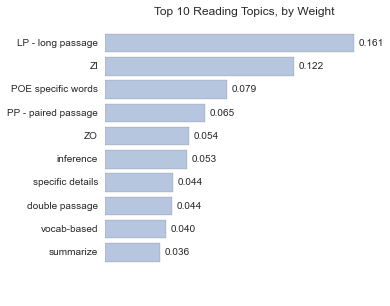

In [8]:
def drawTopicsBarChart(cleanDF,subject,title,n_topics=10):
    '''
    Draw a bar chart of topic weights, to get a sense of the broadest topics
    '''
    topicsDF = getTopicWeight(cleanDF)
    df = topicsDF[topicsDF['type']==subject].sort('topicWeight',ascending=False).head(n_topics)
    df = df.sort('topicWeight')
    
    #size and position of bars
    bar_pos = np.arange(df.shape[0])
    bar_size = df['topicWeight']
    bar_labels = df['topic'].tolist()

    #plot
    fig = plt.figure(figsize=[5,5])
    plt.barh(bar_pos,bar_size, align='center', alpha=0.4)
    plt.yticks(bar_pos, bar_labels)
    plt.xticks([],[])
    for x,y in zip(bar_size,bar_pos):
        plt.text(x+0.02*max(bar_size), y, '%.3f' % x, ha='left', va='center')
    plt.title(title)
    
drawTopicsBarChart(df,'reading','Top 10 Reading Topics, by Weight')

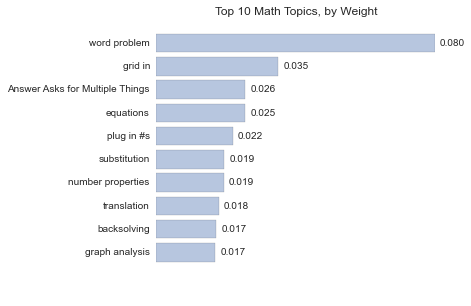

In [10]:
drawTopicsBarChart(df,'math','Top 10 Math Topics, by Weight')

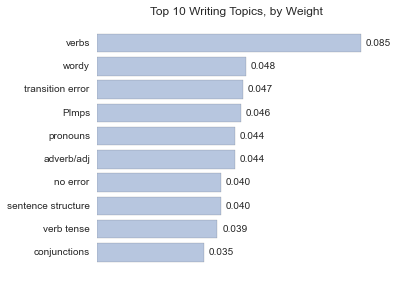

In [11]:
drawTopicsBarChart(df,'writing','Top 10 Writing Topics, by Weight')

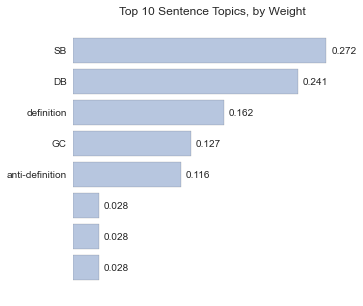

In [12]:
drawTopicsBarChart(df,'sentence','Top 10 Sentence Topics, by Weight')

type,math,reading,sentence,writing
firstName,,,,
Aeson,0.172991,0.095402,0.275281,0.256018
Auston,0.351555,0.198421,0.600000,0.385659
Allan,0.200450,0.198851,0.432584,0.336980
Ayanna,0.139122,0.199408,0.219512,0.282946
Amanda,0.342466,0.244828,0.511236,0.400438
Akayla,0.246927,0.282759,0.567416,0.483589
Ahna,0.348558,0.347826,0.344000,0.489051
Ashli,0.234043,0.354657,0.450450,0.511504
Cheyanne,0.518029,0.378261,0.520000,0.605839


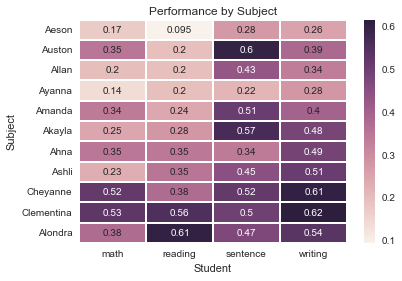

In [13]:
drawHeatmap(df,['firstName','type'],'mean','reading')

type,math,reading,sentence,writing
firstName,,,,
Ayanna,0.139122,0.199408,0.219512,0.282946
Aeson,0.172991,0.095402,0.275281,0.256018
Ahna,0.348558,0.347826,0.344000,0.489051
Allan,0.200450,0.198851,0.432584,0.336980
Ashli,0.234043,0.354657,0.450450,0.511504
Alondra,0.378873,0.605802,0.474576,0.537313
Clementina,0.530099,0.555974,0.500000,0.617699
Amanda,0.342466,0.244828,0.511236,0.400438
Cheyanne,0.518029,0.378261,0.520000,0.605839


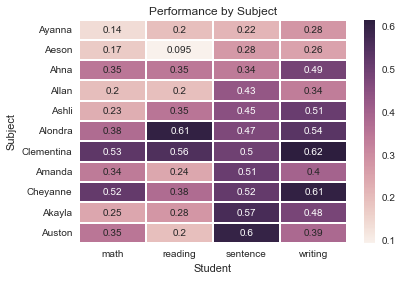

In [14]:
drawHeatmap(df,['firstName','type'],'mean','sentence')

type,math,reading,sentence,writing
firstName,,,,
Aeson,0.172991,0.095402,0.275281,0.256018
Ayanna,0.139122,0.199408,0.219512,0.282946
Allan,0.200450,0.198851,0.432584,0.336980
Auston,0.351555,0.198421,0.600000,0.385659
Amanda,0.342466,0.244828,0.511236,0.400438
Akayla,0.246927,0.282759,0.567416,0.483589
Ahna,0.348558,0.347826,0.344000,0.489051
Ashli,0.234043,0.354657,0.450450,0.511504
Alondra,0.378873,0.605802,0.474576,0.537313


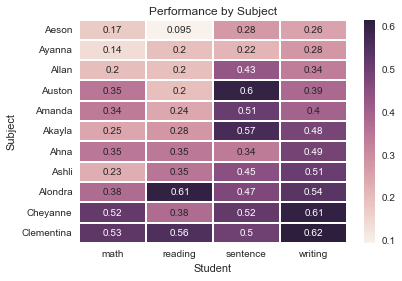

In [15]:
drawHeatmap(df,['firstName','type'],'mean','writing')

In [47]:
def groupTopics(df,statsDF,columns,statVar):
    '''
    Group the data by topic
    '''
    subDF = df[columns+[statVar]]
    grouped = subDF.groupby(columns,sort=True)
    groupedDF = grouped.agg([np.size,np.sum, np.mean,np.std])[statVar]
    groupedDF = groupedDF.reset_index()
    groupedDF.rename(columns={'mean':'meanNumTopics'}, inplace=True)
    mergedDF = pd.merge(statsDF, groupedDF[columns+['meanNumTopics']], how='left', on=columns)
    return mergedDF

In [48]:
def getMostWrongs(df,subject):
    '''
    given the dataframe and subject, identify 
    '''
    if subject:
        subjDF = df.loc[df['type']==subject]
    else: subjDF = df.copy()
    statsDF = groupData(subjDF,['type','topic'],'correct')
    mg = groupTopics(df,statsDF,['topic'],'numTopics')
    mg['wrong']=mg['size'] - mg['sum']
    return mg.sort('wrong',ascending=False)

classPerf = getMostWrongs(df,'sentence')
classPerf

,type,topic,size,sum,mean,std,meanNumTopics,wrong
6,sentence,SB,574,220,0.383275,0.486609,1.726481,354
3,sentence,DB,509,254,0.499018,0.500491,1.683694,255
8,sentence,definition,341,146,0.428152,0.495538,2.117302,195
5,sentence,GC,267,124,0.464419,0.499669,2.438202,143
7,sentence,anti-definition,168,74,0.440476,0.497928,2.714286,94
4,sentence,FOLLOW UP,51,25,0.490196,0.504878,1.059048,26
0,sentence,,8,5,0.625000,0.517549,3.000000,3
1,sentence,,8,5,0.625000,0.517549,3.000000,3
2,sentence,,8,8,1.000000,0.000000,3.000000,0


In [49]:
def getPerfByStudent(df,columns=['firstName','type','topic'],statVar='correct',
                     passingThreshold=0.5):
    '''
    Get score by topic, by student, along with whether the score is above a passing threshold
    args:
        df
        columns: columns to group by
        statVar: statistic your'e measuring
        passingThreshold: minimum score to pass
    returns: 
        studentPerf: dataframe listing scores by student by topic
    '''
    foo = groupData(df,columns,statVar)
    foo['wrong']=foo['size'] - foo['sum']

    #establish passing score
    foo['passing']=0
    foo.loc[foo['mean']>=passingThreshold,'passing']=1
    foo.rename(columns={'size':'numQuestions','sum':'numCorrect','mean':'score'},inplace=True)
    studentPerf = foo
    
    return studentPerf
    
def compareToClass(df,columns=['firstName','type','topic'],statVar='correct',passingThreshold=0.5):
    studentPerf = getPerfByStudent(df,columns,statVar,passingThreshold)
    foo = studentPerf[['type','topic','passing']]
    grouped = foo.groupby(by=['type','topic'],as_index=True)
    bar = grouped.agg([np.size,np.sum, np.mean])['passing']
    bar = bar.reset_index()
    bar.rename(columns={'size':'numStudentsGivenTopic','sum':'numStudentsPassed','mean':'pctStudentsPassed'},inplace=True)
    return studentPerf,bar

def getClassAvg(df,columns=['firstName','type','topic'],statVar='correct',passingThreshold=0.5):
    studentPerf = getPerfByStudent(df,columns,statVar,passingThreshold)
    foo = studentPerf[['type','topic','score']]
    grouped = foo.groupby(by=['type','topic'],as_index=True)
    bar = grouped.agg([np.size, np.mean])['score']
    bar = bar.reset_index()
    bar.rename(columns={'size':'numStudentsGivenTopic','mean':'classAvg'},inplace=True)
    return studentPerf,bar

studentPerf,classPerf = getClassAvg(df)
#getPerfByStudent(df)
studentPerf.head()

,firstName,type,topic,numQuestions,numCorrect,score,std,wrong,passing
0,Aeson,math,123 question,8,0,0.00,0.0,8,0
1,Aeson,math,3D Cube,4,1,0.25,0.5,3,0
2,Aeson,math,3D geometry,5,0,0.00,0.0,5,0
3,Aeson,math,FOLLOW UP,1,0,0.00,NaN,1,0
4,Aeson,math,Pythagorean theorem,6,0,0.00,0.0,6,0


In [14]:
studentPerf,classPerf=getClassAvg(df)
classPerf=classPerf.sort(columns="numStudentsGivenTopic")
classPerf.head()

,type,topic,numStudentsGivenTopic,classAvg
163,writing,Not only but also,2,0.500000
122,math,work/output,3,0.666667
125,reading,FOLLOW UP,3,0.560000
157,sentence,FOLLOW UP,3,0.490196
165,writing,Redundancy,3,0.000000


In [61]:
def buildRecTable(df,passingThreshold=0.6,minWrong=5):
    '''
    Get a data frame of topics in which this student is farthest behind the rest of the class, weighted by topic weight.
    These are recommendations for further study
    args:
        df:
        passingThreshold:
        minWrong: minimum number of wrong answers to make a recommendation
    returns:
        rec: Dataframe of topics in which this student is farthest behind the rest of the class,
             ranked by the difference between this student's % correct and the class avg.
    '''
    topicsDF = getTopicWeight(df)
    studentPerf,classPerf = getClassAvg(df,columns=['firstName','type','topic'],statVar='correct',passingThreshold=passingThreshold)
    classPerf = classPerf.sort('numStudentsGivenTopic')
    q1 = pd.merge(studentPerf,classPerf,on=['type','topic'])
    q2 = pd.merge(q1,topicsDF, how='left',on=['type','topic'])
    rec = q2[['firstName','type','topic','topicWeight','wrong','score','classAvg']]
    rec['scoreDiff']=rec['score'] - rec['classAvg']
    rec['weightedScoreDiff'] = rec['scoreDiff']*rec['topicWeight']
    
    #only recommend areas where the student got at least a few wrong
    rec = rec[rec['wrong']>=minWrong]
    
    for col in ['topicWeight','score','classAvg','scoreDiff']:
        rec[col] = rec[col].round(2)
    return rec.sort('weightedScoreDiff',ascending=True)

def recommendForStudent(df,firstName):
    rec = buildRecTable(df)
    return rec.loc[rec['firstName']==firstName].head()

rec = buildRecTable(df)
rec
#rec.to_csv('recTable.csv')

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,firstName,type,topic,topicWeight,wrong,score,classAvg,scoreDiff,weightedScoreDiff
1419,Ayanna,sentence,DB,0.24,41,0.23,0.50,-0.28,-0.066504
1433,Aeson,sentence,SB,0.27,40,0.18,0.38,-0.20,-0.054347
1441,Ayanna,sentence,SB,0.27,48,0.19,0.38,-0.20,-0.053593
1450,Ayanna,sentence,anti-definition,0.12,20,0.05,0.44,-0.39,-0.045386
1155,Aeson,reading,LP - long passage,0.16,149,0.10,0.31,-0.21,-0.033617
1430,Ayanna,sentence,GC,0.13,23,0.21,0.47,-0.26,-0.033032
1218,Aeson,reading,ZI,0.12,106,0.09,0.34,-0.25,-0.030857
1411,Aeson,sentence,DB,0.24,27,0.39,0.50,-0.12,-0.027894
1809,Ayanna,writing,verbs,0.09,28,0.15,0.45,-0.30,-0.025829
1422,Aeson,sentence,GC,0.13,19,0.27,0.47,-0.20,-0.025139


In [20]:
recommendForStudent(df,'Aeson')

/Users/charlieg/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/charlieg/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,firstName,type,topic,topicWeight,wrong,score,classAvg,scoreDiff,weightedScoreDiff
1433,Aeson,sentence,SB,0.27,40,0.18,0.38,-0.20,-0.054347
1155,Aeson,reading,LP - long passage,0.16,149,0.10,0.31,-0.21,-0.033617
1218,Aeson,reading,ZI,0.12,106,0.09,0.34,-0.25,-0.030857
1411,Aeson,sentence,DB,0.24,27,0.39,0.50,-0.12,-0.027894
1422,Aeson,sentence,GC,0.13,19,0.27,0.47,-0.20,-0.025139


In [21]:
for name in df.firstName.unique():
    x = recommendForStudent(df,name)
    print x[['firstName','type','topic','weightedScoreDiff']].head()

     firstName      type              topic  weightedScoreDiff
1433     Aeson  sentence                 SB          -0.054347
1155     Aeson   reading  LP - long passage          -0.033617
1218     Aeson   reading                 ZI          -0.030857
1411     Aeson  sentence                 DB          -0.027894
1422     Aeson  sentence                 GC          -0.025139
     firstName      type         topic  weightedScoreDiff
1434      Ahna  sentence            SB          -0.024282
1412      Ahna  sentence            DB          -0.020111
1453      Ahna  sentence    definition          -0.020041
1423      Ahna  sentence            GC          -0.014540
1686      Ahna   writing  pronoun case          -0.002925
     firstName     type              topic  weightedScoreDiff
1231    Akayla  reading                 ZO          -0.005397
1608    Akayla  writing           no error          -0.005377
1289    Akayla  reading     double passage          -0.004882
634     Akayla     math  n

/Users/charlieg/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/charlieg/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [43]:
df2 = df[['CorrectAnswer','firstName']]
grouped = df.groupby(['CorrectAnswer'],sort=True)
x = grouped.agg([np.size])['firstName'].sort('size',ascending=False)
x=x.reset_index()

#print sum(x['size']) - sum(x.loc[x['Studentsanswer'].isin(['BLANK','A','B','C','D','E']),'size'])
df.head()

,firstName,lastName,testID,testQuestionNumber,testSectionNumber,type,CorrectAnswer,Studentsanswer,topic,correct,numTopics
0,Aeson,Purse,OLSAT8.PT2,1,2,math,A,B,backsolving,0,3
1,Aeson,Purse,OLSAT8.PT2,1,2,math,A,B,equations,0,3
2,Aeson,Purse,OLSAT8.PT2,1,2,math,A,B,substitution,0,3
3,Aeson,Purse,OLSAT7.PT1,1,2,sentence,E,C,DB,0,2
4,Aeson,Purse,OLSAT7.PT1,1,2,sentence,E,C,GC,0,2


In [44]:
foo = groupData(df,['firstName','type','topic'],'correct')
foo.head()
foo.to_csv('aeson_topics.csv')

#K-Means Clustering

In [24]:
d1 = groupData(rec,['firstName','type','topic'],'weightedScoreDiff').sort('size',ascending=False)
d1['type_topic']=d1['type']+' '+d1['topic']
d1.rename(columns={'mean':'weightedScoreDiff'},inplace=True)
d2 = d1.pivot('type_topic','firstName','weightedScoreDiff')
d2.sort('Akayla')

firstName,Aeson,Ahna,Akayla,Allan,Alondra,Amanda,Ashli,Auston,Ayanna,Cheyanne,Clementina
type_topic,,,,,,,,,,,
reading ZO,-0.010330,0.003554,-0.005397,-0.006384,0.022585,-0.006384,-0.000710,-0.005498,-0.005498,0.002003,0.012059
writing no error,-0.003556,0.002214,-0.005377,-0.005377,0.006985,0.000088,-0.000172,-0.000172,-0.004466,0.010007,-0.000172
reading double passage,-0.009477,NaN,-0.004882,-0.004882,NaN,-0.000287,0.002010,0.004308,-0.004882,NaN,0.018093
math number properties,-0.004610,-0.000208,-0.003692,-0.000019,0.001817,-0.000019,-0.002093,0.002262,-0.003337,0.004896,0.005002
reading LP - long passage,-0.033617,0.003373,-0.003357,-0.015071,0.043958,-0.010190,0.009189,-0.024760,-0.018444,0.004992,0.043928
math inequalities,0.000065,-0.000907,-0.003173,0.000065,0.000749,0.000065,-0.002301,0.001360,-0.000907,0.001360,NaN
math function notation,-0.002232,0.001695,-0.002889,-0.002167,0.001443,-0.000001,-0.002444,0.001054,-0.001791,0.002453,0.004879
math perpendicular,NaN,NaN,-0.002807,-0.002807,NaN,NaN,NaN,NaN,-0.001904,NaN,NaN
reading comparisons,-0.004212,NaN,-0.002680,NaN,NaN,-0.001149,NaN,NaN,-0.001149,NaN,NaN


In [25]:
rec = rec.sort('weightedScoreDiff')
rec.head(15)

,firstName,type,topic,topicWeight,wrong,score,classAvg,scoreDiff,weightedScoreDiff
1419,Ayanna,sentence,DB,0.24,41,0.23,0.50,-0.28,-0.066504
1433,Aeson,sentence,SB,0.27,40,0.18,0.38,-0.20,-0.054347
1441,Ayanna,sentence,SB,0.27,48,0.19,0.38,-0.20,-0.053593
1450,Ayanna,sentence,anti-definition,0.12,20,0.05,0.44,-0.39,-0.045386
1155,Aeson,reading,LP - long passage,0.16,149,0.10,0.31,-0.21,-0.033617
1430,Ayanna,sentence,GC,0.13,23,0.21,0.47,-0.26,-0.033032
1218,Aeson,reading,ZI,0.12,106,0.09,0.34,-0.25,-0.030857
1411,Aeson,sentence,DB,0.24,27,0.39,0.50,-0.12,-0.027894
1809,Ayanna,writing,verbs,0.09,28,0.15,0.45,-0.30,-0.025829
1422,Aeson,sentence,GC,0.13,19,0.27,0.47,-0.20,-0.025139


In [26]:
#identify topics with the greatest class spread
#group the bottom 3 and remove them from the class

#identify the topics with the greatest spread among the remaining class
#group the bottom 3

#repeat.
rec[rec['topic']=='LP - long passage']

,firstName,type,topic,topicWeight,wrong,score,classAvg,scoreDiff,weightedScoreDiff
1155,Aeson,reading,LP - long passage,0.16,149,0.10,0.31,-0.21,-0.033617
1162,Auston,reading,LP - long passage,0.16,173,0.15,0.31,-0.15,-0.024760
1163,Ayanna,reading,LP - long passage,0.16,165,0.19,0.31,-0.11,-0.018444
1158,Allan,reading,LP - long passage,0.16,130,0.21,0.31,-0.09,-0.015071
1160,Amanda,reading,LP - long passage,0.16,125,0.24,0.31,-0.06,-0.010190
1157,Akayla,reading,LP - long passage,0.16,118,0.28,0.31,-0.02,-0.003357
1156,Ahna,reading,LP - long passage,0.16,134,0.33,0.31,0.02,0.003373
1164,Cheyanne,reading,LP - long passage,0.16,132,0.34,0.31,0.03,0.004992
1161,Ashli,reading,LP - long passage,0.16,130,0.36,0.31,0.06,0.009189
1165,Clementina,reading,LP - long passage,0.16,86,0.58,0.31,0.27,0.043928


In [27]:
#Grouping students
N_CLUSTERS=3
kmeans = KMeans(init='k-means++',n_clusters=N_CLUSTERS,n_init=10)
typePivot['cluster']=kmeans.fit_predict(typePivot)
typePivot

type,math,reading,sentence,writing,cluster
firstName,,,,,
Ayanna,0.139122,0.199408,0.219512,0.282946,1
Aeson,0.172991,0.095402,0.275281,0.256018,1
Allan,0.200450,0.198851,0.432584,0.336980,1
Ashli,0.234043,0.354657,0.450450,0.511504,2
Akayla,0.246927,0.282759,0.567416,0.483589,2
Amanda,0.342466,0.244828,0.511236,0.400438,2
Ahna,0.348558,0.347826,0.344000,0.489051,2
Auston,0.351555,0.198421,0.600000,0.385659,2
Alondra,0.378873,0.605802,0.474576,0.537313,0


#TODO:
- get actual trends over time.  What are the areas of best improvement over the whole class?  Worst?
- Write up answer to last question

#Trends Over Time

In [28]:
df.testID.unique()

array(['OLSAT8.PT2', 'OLSAT7.PT1', 'OLSAT4.PT4', 'OLSAT9.PT3',
       'OLSAT5.PT5', 'BBTest1', 'BBTest7', 'BBTest2', 'YL_4_PP_SAT_S0512',
       'YL_1_PP_SAT_S0114', 'YL_3_PP_SAT_OCTOBER_2011',
       'YL_2_PP_SAT_S0112', 'YL_5_PP_SAT_S0113', 'BBTest8', 'BBTest9',
       'BBTest5', 'BBTest10', 'YL_6_PP_SAT_S0111', 'BBTest6', 'BBTest3',
       'BBTest4'], dtype=object)

In [29]:

#we want change in subject performance over time, and change in topic performance over time
#plot the changes in subject performance, identify the biggest increases in topic performance

/Users/charlieg/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


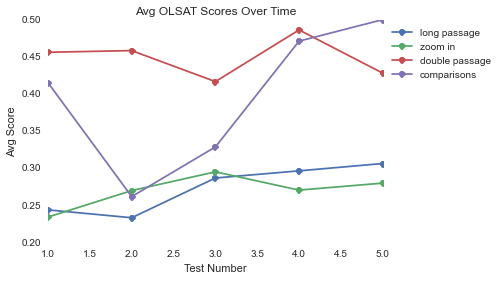

In [46]:
def getTrendsOverTime(df,testString,columns=['type','testNum']):
    if testString=='OL':
        sequencePos = -1
    elif testString=='PP_SAT':
        sequencePos = 3
    ol = df[df.testID.str.contains(testString)]
    ol['testNum']=ol.testID.str[sequencePos]
    trendsDF = groupData(ol,columns,'correct')
    trendsDF.rename(columns={'mean':'avgScore'},inplace=True)
    return trendsDF

def plotTrends(trendsDF,title):
    subjects = trendsDF.type.unique()
    for subject in subjects:
        foo = trendsDF[trendsDF['type']==subject]
        x = foo['testNum']
        y = foo['avgScore']
        plt.plot(x,y,'-o')
        plt.label=subject

    plt.ylabel('Avg Score')
    plt.xlabel('Test Number')
    plt.title(title)
    foo = ['long passage','zoom in','double passage','comparisons']
    plt.legend(foo,bbox_to_anchor=(1, 1), loc=2)

ol = getTrendsOverTime(df,'OL')
plotTrends(ol,'Avg OLSAT Scores Over Time')

/Users/charlieg/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


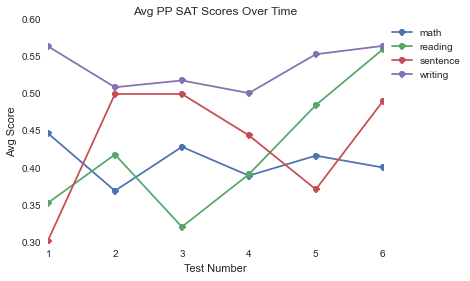

In [31]:
yl = getTrendsOverTime(df,'PP_SAT')
plotTrends(yl,'Avg PP SAT Scores Over Time')

In [32]:
topicTrends = getTrendsOverTime(df,'OL',columns=['type','topic','testNum'])
tt = topicTrends.groupby(by=['type','topic']).agg({'size':np.min,'avgScore':[np.min,np.max]})
tt = tt.reset_index()
tt['scoreChange'] = tt['avgScore']['amax'] - tt['avgScore']['amin']
topChanges = list(tt.sort('scoreChange',ascending=False)['topic'].head())

/Users/charlieg/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


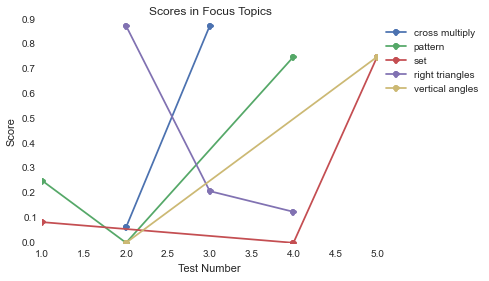

In [39]:
trendsDF = topicTrends
subjects = topChanges
title = 'Scores in Focus Topics'
for subject in subjects:
    foo = trendsDF[trendsDF['topic']==subject]
    x = foo['testNum']
    y = foo['avgScore']
    plt.plot(x,y,'-o')
    plt.label=subject

plt.ylabel('Score')
plt.xlabel('Test Number')
plt.title(title)
plt.legend(subjects,bbox_to_anchor=(1, 1), loc=2)

In [15]:
df

,firstName,lastName,testID,testQuestionNumber,testSectionNumber,type,CorrectAnswer,Studentsanswer,topic,difficulty,correct,numTopics
0,Aeson,Purse,OLSAT8.PT2,1,2,math,A,B,backsolving,easy,0,3
1,Aeson,Purse,OLSAT8.PT2,1,2,math,A,B,equations,easy,0,3
2,Aeson,Purse,OLSAT8.PT2,1,2,math,A,B,substitution,easy,0,3
3,Aeson,Purse,OLSAT7.PT1,1,2,sentence,E,C,DB,easy,0,2
4,Aeson,Purse,OLSAT7.PT1,1,2,sentence,E,C,GC,easy,0,2
5,Aeson,Purse,OLSAT4.PT4,1,2,math,A,A,translation,easy,1,4
6,Aeson,Purse,OLSAT4.PT4,1,2,math,A,A,rate,easy,1,4
7,Aeson,Purse,OLSAT4.PT4,1,2,math,A,A,equations,easy,1,4
8,Aeson,Purse,OLSAT4.PT4,1,2,math,A,A,word problem,easy,1,4
9,Aeson,Purse,OLSAT9.PT3,1,2,sentence,C,B,definition,easy,0,2


# Functions for a single test

In [21]:
fpath = "OneTest.csv"
rawDF = pd.read_csv(fpath)
test1 = clean_data(rawDF)
test1 = addNumTopics(test1)
test1= test1.dropna(how='any')
test1

,firstName,lastName,testID,testQuestionNumber,testSectionNumber,type,CorrectAnswer,Studentsanswer,topic,difficulty,mainTopic,correct,numTopics
0,Aeson,Purse,OLSAT4.PT4,1,2,math,A,A,translation,easy,Geometry,1,4
1,Aeson,Purse,OLSAT4.PT4,1,2,math,A,A,rate,easy,Geometry,1,4
2,Aeson,Purse,OLSAT4.PT4,1,2,math,A,A,equations,easy,Geometry,1,4
3,Aeson,Purse,OLSAT4.PT4,1,2,math,A,A,word problem,easy,Geometry,1,4
4,Aeson,Purse,OLSAT4.PT4,2,2,math,A,A,quadratic,easy,Geometry,1,5
5,Aeson,Purse,OLSAT4.PT4,2,2,math,A,A,possible values,easy,Geometry,1,5
6,Aeson,Purse,OLSAT4.PT4,2,2,math,A,A,factoring/distribution,easy,Geometry,1,5
7,Aeson,Purse,OLSAT4.PT4,2,2,math,A,A,roots/zeroes,easy,Geometry,1,5
8,Aeson,Purse,OLSAT4.PT4,2,2,math,A,A,word problem,easy,Geometry,1,5
9,Aeson,Purse,OLSAT4.PT4,3,2,math,C,A,probability,easy,Geometry,0,4


In [7]:
def createSubjects(test):
    """creates smaller data frames specific to a Subject
    input: a cleaned test
    output: the data frames in this order: sentence,reading,math,writing
    """
    df=test.copy()
    sentence=df[df['type'].isin(['sentence'])]
    reading=df[df['type'].isin(['reading'])]
    math=df[df['type'].isin(['math'])]
    writing=df[df['type'].isin(['writing'])]
    
    return sentence,reading,math,writing
    
sentence,reading,math,writing=createSubjects(test1)
writing.head()

,firstName,lastName,testID,testQuestionNumber,testSectionNumber,type,CorrectAnswer,Studentsanswer,topic,difficulty,mainTopic,correct,numTopics
132,Aeson,Purse,OLSAT4.PT4,1,5,writing,C,C,idiomatic,easy,Geometry,1,1
133,Aeson,Purse,OLSAT4.PT4,2,5,writing,B,B,verb tense,easy,Geometry,1,1
134,Aeson,Purse,OLSAT4.PT4,3,5,writing,E,E,wordy,easy,Geometry,1,3
135,Aeson,Purse,OLSAT4.PT4,3,5,writing,E,E,awkward ing,easy,Geometry,1,3
136,Aeson,Purse,OLSAT4.PT4,3,5,writing,E,E,adverb/adj,easy,Geometry,1,3


In [16]:
def createStudent(firstName, test):
    #firstName is a string
    #do they have unique first names? that would be great
    #a student is a list of his/her subjects 
    df=test.copy()
    student=df[df['firstName'].isin([firstName])]
    [sentence,reading,math,writing]=createSubjects(student)
    return [sentence,reading,math,writing]

Aeson=createStudent("Aeson",test1)
Aeson[2]


,firstName,lastName,testID,testQuestionNumber,testSectionNumber,type,CorrectAnswer,Studentsanswer,topic,difficulty,mainTopic,correct,numTopics
0,Aeson,Purse,OLSAT4.PT4,1,2,math,A,A,translation,easy,Geometry,1,4
1,Aeson,Purse,OLSAT4.PT4,1,2,math,A,A,rate,easy,Geometry,1,4
2,Aeson,Purse,OLSAT4.PT4,1,2,math,A,A,equations,easy,Geometry,1,4
3,Aeson,Purse,OLSAT4.PT4,1,2,math,A,A,word problem,easy,Geometry,1,4
4,Aeson,Purse,OLSAT4.PT4,2,2,math,A,A,quadratic,easy,Geometry,1,5
5,Aeson,Purse,OLSAT4.PT4,2,2,math,A,A,possible values,easy,Geometry,1,5
6,Aeson,Purse,OLSAT4.PT4,2,2,math,A,A,factoring/distribution,easy,Geometry,1,5
7,Aeson,Purse,OLSAT4.PT4,2,2,math,A,A,roots/zeroes,easy,Geometry,1,5
8,Aeson,Purse,OLSAT4.PT4,2,2,math,A,A,word problem,easy,Geometry,1,5
9,Aeson,Purse,OLSAT4.PT4,3,2,math,C,A,probability,easy,Geometry,0,4


In [9]:
def createClass(subject,names):
    """Input: subject: a subject of the test (each class focuses on one subject)
            names: a list of first Names of students in the class
        Output: a list of subjects containing only those students"""
    foo=subject.copy()
    foo=foo[foo['firstName'].isin(names)]
    return foo

peter=createClass(writing,["Akayla","Allan","Clementina"])
peter.head()

,firstName,lastName,testID,testQuestionNumber,testSectionNumber,type,CorrectAnswer,Studentsanswer,topic,difficulty,mainTopic,correct,numTopics
634,Akayla,Watson,OLSAT4.PT4,1,5,writing,C,C,idiomatic,easy,Geometry,1,1
635,Akayla,Watson,OLSAT4.PT4,2,5,writing,B,B,verb tense,easy,Geometry,1,1
636,Akayla,Watson,OLSAT4.PT4,3,5,writing,E,E,wordy,easy,Geometry,1,3
637,Akayla,Watson,OLSAT4.PT4,3,5,writing,E,E,awkward ing,easy,Geometry,1,3
638,Akayla,Watson,OLSAT4.PT4,3,5,writing,E,E,adverb/adj,easy,Geometry,1,3


In [31]:
def removeDuplicateQs(df):
    #consolidates so each question appears only once in a data frame
    df=df.drop_duplicates(['firstName','testID','testQuestionNumber','testSectionNumber'])  
    return df


def removeBlanks(df):
    #for a calculation of accuracy; this removes questions that are left blank
    df=df[df.Studentsanswer!='BLANK']
    return df

def accuracy(studentSubject):
    """Input: a student's subject (Sentence/Reading/Math/Writing)
       Output: a table with thier accuracy stats for that subject"""
    df=removeDuplicateQs(studentSubject)
    totalQs=float(df.shape[0])
    df=removeBlanks(df)
    QsAnswered=float(df.shape[0])
    PercentAnswered=(QsAnswered/totalQs)
    correct=float(df[df.CorrectAnswer==df.Studentsanswer].shape[0])
    accuracy=correct/QsAnswered  
    
    accData= {'Number of Questions': [totalQs], 'Questions Answered': [QsAnswered],'Correct Answers': [correct],
                'Percent Answered':[PercentAnswered],'Accuracy':[accuracy]}
    accTable = pd.DataFrame(accData,index=['Value'])
    accTable=accTable[['Number of Questions','Questions Answered','Correct Answers','Percent Answered','Accuracy']]
    
    return accTable
    
accuracy(Clementina[3])

,Number of Questions,Questions Answered,Correct Answers,Percent Answered,Accuracy
Value,49,44,35,0.897959,0.795455


In [29]:
def summaryTable(subject,topics):
    """Input: df: A class or student subject
    topics: a list of Main topics
    Output: a table with the questions broken down by main topics and difficulty"""
    
    Easy=[]
    Medium=[]
    Hard=[]
    Total=[]
    
    for topic in topics:
        df=subject[subject.topic==topic]
        df=removeDuplicateQs(df)
        totalQs=float(df.shape[0])
        totalCorrect=float(df[df.CorrectAnswer==df.Studentsanswer].shape[0])
        totalPercent=totalCorrect/totalQs
        Total.append(totalPercent)
        easy=df[df.difficulty=='easy']
        easyQs=float(easy.shape[0])
        easyCorrect=float(easy[easy.CorrectAnswer==easy.Studentsanswer].shape[0])
        if easyQs>0:
            easyPercent=easyCorrect/easyQs
            Easy.append(easyPercent)
        else:
            Easy.append('None')
        med=df[df.difficulty=='med']
        medQs=float(med.shape[0])
        medCorrect=float(med[med.CorrectAnswer==med.Studentsanswer].shape[0])
        if medQs>0:
            medPercent=medCorrect/medQs
            Medium.append(medPercent)
        else:
            Medium.append('None')
        hard=df[df.difficulty=='hard']
        hardQs=float(hard.shape[0])
        hardCorrect=float(hard[hard.CorrectAnswer==hard.Studentsanswer].shape[0])
        if hardQs>0:
            hardPercent=hardCorrect/hardQs
            Hard.append(hardPercent)
        else:
            Hard.append('None')
  
    summaryData= {'Easy': Easy,'Medium': Medium, 'Hard':Hard,'Total':Total}
    summaryTable = pd.DataFrame(summaryData,index=topics)
    summaryTable=summaryTable[['Easy','Medium','Hard','Total']]
    
    return summaryTable
        
        

    
summaryTable(Aeson[2],['average','word problem','slope'])

,Easy,Medium,Hard,Total
average,0.000,None,None,0.00000
word problem,0.375,0,None,0.26087
slope,0.000,0,None,0.00000
